<a href="https://colab.research.google.com/github/adityasankalp/Iris_ML/blob/main/iris_species_with_basics_of_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the relevant modules , numpy, pandas and tensorflow

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Model
import math as math
import matplotlib.pyplot as plt

Load the Iris file and store it in a dataframe. Check the data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Iris.csv') # read the database in a dataframe

In [5]:
data1.head(10) # examine the first 10 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
data2 = data1.copy() # copy the database in a new dataframe
data2.shape
data_3 = data2.sample(frac = 1).reset_index(drop = "true") # randomizes the dataframe
data_test = data_3[:10] # copies 10 data for test
data_train = data_3[20:].reset_index(drop ='true') # copies 130 data for training
data_ft = data_3[10:20] # Additional 10 data for further testing

In [7]:
print(data_test)
print(data_train)

    Id  SepalLengthCm  ...  PetalWidthCm          Species
0   79            6.0  ...           1.5  Iris-versicolor
1   27            5.0  ...           0.4      Iris-setosa
2   61            5.0  ...           1.0  Iris-versicolor
3  126            7.2  ...           1.8   Iris-virginica
4    8            5.0  ...           0.2      Iris-setosa
5  131            7.4  ...           1.9   Iris-virginica
6   50            5.0  ...           0.2      Iris-setosa
7   18            5.1  ...           0.3      Iris-setosa
8  144            6.8  ...           2.3   Iris-virginica
9   30            4.7  ...           0.2      Iris-setosa

[10 rows x 6 columns]
      Id  SepalLengthCm  ...  PetalWidthCm          Species
0    127            6.2  ...           1.8   Iris-virginica
1     16            5.7  ...           0.4      Iris-setosa
2     68            5.8  ...           1.0  Iris-versicolor
3    149            6.2  ...           2.3   Iris-virginica
4    125            6.7  ...           

In [8]:
data_train.shape

(130, 6)

In [9]:
# copy the features in training data
x_train = data_train[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]].copy()
x_train.head()
x_test = data_test[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]].copy()
x_ft = data_ft[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]].copy()

# copy the labels for comparison
y_train = data_train[["Species"]].copy()
y_test = data_test[["Species"]].copy()
y_ft = data_ft[["Species"]].copy()
y_train.head()

,Species
0,Iris-virginica
1,Iris-setosa
2,Iris-versicolor
3,Iris-virginica
4,Iris-virginica


In [10]:
# Convert training data to matrix format  from dataframe to model
x_trainA = np.array(x_train)
print(x_trainA.shape)
x_testA = np.array(x_test)
x_testA.shape
#print(x_testA)
x_ftA = np.array(x_ft)

(130, 4)


In [11]:
print(x_test)
print(x_testA)

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            6.0           2.9            4.5           1.5
1            5.0           3.4            1.6           0.4
2            5.0           2.0            3.5           1.0
3            7.2           3.2            6.0           1.8
4            5.0           3.4            1.5           0.2
5            7.4           2.8            6.1           1.9
6            5.0           3.3            1.4           0.2
7            5.1           3.5            1.4           0.3
8            6.8           3.2            5.9           2.3
9            4.7           3.2            1.6           0.2
[[6.  2.9 4.5 1.5]
 [5.  3.4 1.6 0.4]
 [5.  2.  3.5 1. ]
 [7.2 3.2 6.  1.8]
 [5.  3.4 1.5 0.2]
 [7.4 2.8 6.1 1.9]
 [5.  3.3 1.4 0.2]
 [5.1 3.5 1.4 0.3]
 [6.8 3.2 5.9 2.3]
 [4.7 3.2 1.6 0.2]]


In [90]:
# one- hot encoding of the labels requires as labels are in string format.
y_testA = y_test.replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
y_trainA = y_train.replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
y_ftA = y_ft.replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

y_testB = tf.one_hot(y_testA['Species'].tolist(),3) # one hot encoding of test and training data
print(y_testB)
y_trainB = tf.one_hot(y_trainA['Species'].tolist(),3)
#print(y_trainB)
y_ftB = np.array(tf.one_hot(y_ftA['Species'].tolist(),3))

tf.Tensor(
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]], shape=(10, 3), dtype=float32)


In [21]:
y_trainB2 = np.array(y_trainB)
y_testB2 = np.array(y_testB)

In [14]:
#a1 = np.ones((4,1))

#x_trainA[129:130].shape
#x_trainA[0:1] @ a1
#y_trainB2[0:1].shape
#np.random.rand(3,1)
np.sum(x_trainA[0:])

1803.8

In [15]:
def sigma(x):
  x1 = 1/(1+np.exp(-x))
  return(x1)

In [16]:
def relu_f(x):
  return(np.maximum(0,x))

def relu2(x):
  x[x<=0] =0
  x[x>0] = 1
  return(x)

def soft(x):
  return(np.exp(x)/np.sum(np.exp(x),axis = 0 ,keepdims = 1))

def relu_d(x):
  return(np.greater(x, 0).astype(int))
    

In [17]:
test2 = [[-21, -3, -4, 4],[3, 4, 0.34, 6]]
test3 = np.array(test2)
#print(relu_f(test3))
#print(relu_d(test2))
print(soft(test2))



[[3.77513454e-11 9.11051194e-04 1.28687642e-02 1.19202922e-01]
 [1.00000000e+00 9.99088949e-01 9.87131236e-01 8.80797078e-01]]


0.2900948368296573


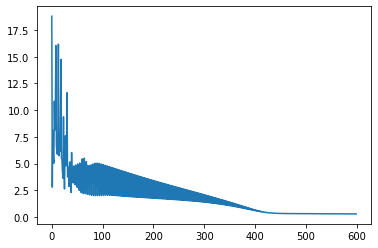

In [27]:
m1 = x_trainA.shape[0]
#print(m1)
learning_rate = 0.01

w1 = np.random.rand(4,32) # initialise first weight with random weights between 0 an 1
b1 = np.random.rand(32,1) # initialise bias with random numbers between 0 and 1
w2 = np.random.rand(32,3)
b2 = np.random.rand(3,1)
#print(w2)
Loss1 = 0
loss2 = []
dz1 = 0
dz2 = 0
dw1 = 0
dw2 = 0
db1 = 0 
db2 = 0
for i in range(0,600):
  z1 = (w1.T) @ (x_trainA.T) + b1
  a1 = relu_f(z1)
  z2 = (w2.T) @ (a1) + b2
  a2a = relu_f(z2)
  a2 = soft(a2a)
  Loss1 = np.sum(-(y_trainB2.T*np.log(a2) + (1-y_trainB2.T)*(np.log(1-a2)))/m1)
  #print(Loss1)
  loss2.append(Loss1)

  dz2 = (a2 - y_trainB2.T)
  dw2 = a1 @ dz2.T
  db2 = np.sum(dz2)

  dz1 = (w2 @ dz2)*(relu_d(a1))
  dw1 = x_trainA.T @ dz1.T
  db1 = np.sum(dz1)

  w2 = w2 - learning_rate*dw2/m1
  b2 = b2 - learning_rate*db2/m1
  w1 = w1 - learning_rate*dw1/m1
  b1 = b1 - learning_rate*db1/m1

  #print(" dz2,dw2,db2",dz2,dw2,db2)
  #print(" dz1,dw1,db1",dz1,dw1,db1)
  #print(w2)
print(Loss1)
plt.plot(list(range(0,600)),loss2)
plt.grid(which = 'minor', axis ='both')
plt.show()


In [24]:
#(a22/max(a22)>0.99).astype(int)

w1 = np.random.rand(4,4) # initialise first weight with random weights between 0 an 1
b1 = np.random.rand(4,1) # initialise bias with random numbers between 0 and 1
w2 = np.random.rand(4,3)
b2 = np.random.rand(3,1)

z1 = (w1.T) @ (x_trainA.T) + b1
a1 = relu_f(z1)
z2 = (w2.T) @ (a1) + b2
a2a = relu_f(z2)
a2 = soft(a2a)
Loss1 = np.sum(-(y_trainB2.T*np.log(a2) + (1-y_trainB2.T)*(np.log(1-a2)))/m1)
#print(a2.shape)
#print(a2a)
print(Loss1)

9.007061697194734


In [86]:
def compare(x2,y2):
  label = ['Iris-setosa','Iris-versicolor','Iris-virginica']
  t2 = (np.greater(x2,0.7).astype(int))
  t3 = np.argmax(t2,axis = 0)
  t4 = np.argmax(y2,axis = 1)
#print(a22)
#print(t2.shape)
#print(t3)
#label.T @ t2
  t55 =[]
  for i in range(0,10):
  #print(label[t3[i]],label[t4[i]])
    t55.append('Test is '+label[t3[i]]+'  Label is '+label[t4[i]])
  return(t55)
    #print(np.array(t55).T)


In [78]:
#x_testA
#print(x_testA)
#for i in range(0,10):
def evaluate_model(x1,y1):
  z11 = (w1.T) @ (x1.T) + b1
#print(z11)
  a11 = relu_f(z11)
  z22 = (w2.T) @ (a11) + b2
  a22a = relu_f(z22)
  a22 = soft(a22a)

  Loss11 = np.sum(-(y1.T*np.log(a22) + (1-y1.T)*(np.log(1-a22)))/len(x1)) 
  #print(Loss11)
  return(a22,Loss11)
  #print(a22)
  #print((np.greater(a22,0.7).astype(int)))


In [89]:
v1 = evaluate_model(x_testA,y_testB2)
v2 = compare(v1[0],y_testB2)
for i in v2:
  print(i) 

Test is Iris-versicolor  Label is Iris-versicolor
Test is Iris-setosa  Label is Iris-setosa
Test is Iris-versicolor  Label is Iris-versicolor
Test is Iris-virginica  Label is Iris-virginica
Test is Iris-setosa  Label is Iris-setosa
Test is Iris-virginica  Label is Iris-virginica
Test is Iris-setosa  Label is Iris-setosa
Test is Iris-setosa  Label is Iris-setosa
Test is Iris-virginica  Label is Iris-virginica
Test is Iris-setosa  Label is Iris-setosa


In [91]:
v3 = evaluate_model(x_ftA,y_ftB)
v4 = compare(v3[0],y_ftB)
for i in v4:
  print(i) 

Test is Iris-setosa  Label is Iris-setosa
Test is Iris-versicolor  Label is Iris-versicolor
Test is Iris-setosa  Label is Iris-setosa
Test is Iris-virginica  Label is Iris-virginica
Test is Iris-setosa  Label is Iris-virginica
Test is Iris-virginica  Label is Iris-virginica
Test is Iris-virginica  Label is Iris-virginica
Test is Iris-setosa  Label is Iris-setosa
Test is Iris-virginica  Label is Iris-virginica
Test is Iris-setosa  Label is Iris-setosa


In [88]:
np.array(v2)

array(['Test is Iris-versicolor  Label is Iris-versicolor',
       'Test is Iris-setosa  Label is Iris-setosa',
       'Test is Iris-versicolor  Label is Iris-versicolor',
       'Test is Iris-virginica  Label is Iris-virginica',
       'Test is Iris-setosa  Label is Iris-setosa',
       'Test is Iris-virginica  Label is Iris-virginica',
       'Test is Iris-setosa  Label is Iris-setosa',
       'Test is Iris-setosa  Label is Iris-setosa',
       'Test is Iris-virginica  Label is Iris-virginica',
       'Test is Iris-setosa  Label is Iris-setosa'], dtype='<U49')

In [74]:
len(x_testA)

10

In [100]:
y_testB

<tf.Tensor: shape=(10, 3), dtype=float32, numpy=
array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)>

In [ ]:
print(Loss1)

In [55]:
#print(np.random.rand(2,2))
#a1 = np.ones((3,2))
#b1 = 3*np.ones((3,2))

#np.exp(1)
#print(sigma(a1))
#np.log(2)

#print(b1.T @ (a1))
print(y_trainB.shape)
print(x_trainA.shape)
(x_trainA.shape[0])

(130, 3)
(130, 4)


130

In [ ]:
# Convert training data to required format for model
x_trainA = np.array(x_train)
x_trainA.shape
x_testA = np.array(x_test)
x_testA.shape
print(x_testA)
x_ftA = np.array(x_ft)

In [ ]:
#Model architecture using 1 hidden layer and 1 output layer 
model = tf.keras.models.Sequential()     
model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(4,)))    
model.add(tf.keras.layers.Dense(3, activation='softmax'))   

model.summary()

In [ ]:
# Define the loss function, momentum (optimiser) and metrics
model.compile(loss='categorical_crossentropy',optimizer= 'rmsprop',metrics=['accuracy'])

history = model.fit(x_trainA, y_trainB,
                    batch_size=10,
                    epochs=100,
                    verbose=1,
                    validation_data=(x_testA, y_testB))

In [ ]:
# Evaluate the test data
score = model.evaluate(x_testA, y_testB, verbose=0)
# Prints out scores
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
# further tests with additional data
#print(data_ft)
print(x_ftA)
#print(y_ft)
len(x_ftA)
#for i in range(0,len(x_ftA)):
 # print(x_ftA[:][i].T)
for i in x_ftA:
  print(i.T)

In [ ]:
# Comparison of additional test data
label = ['Iris-setosa','Iris-versicolor','Iris-virginica']
#t1 = [[5,2.3,3.3,1]]

#for i in x_ftA:
t2 = model.predict(x_ftA)
#print(t2)
t3 = np.argmax(t2,axis = 1)
#print(t3)

print(y_ft)

for i in t3:
  print(label[i])

#print(label[t3])
#print(t2)
#print(t2.shape)

#print(t3)
